In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
#($\\theta$)

In [33]:
datos1 = pd.read_csv("Torque_mag_data.csv",sep=';')
r1 = np.array(datos1['rvarilla'])*0.01
corriente1 = np.array(datos1['corriente'])
r1

array([0.    , 0.01  , 0.0216, 0.03  , 0.0345, 0.0482, 0.0546])

In [22]:
def campo_est(i,r):
    mu0 = 4*np.pi*10e-7
    N = 195
    d = 0.138
    return (mu0*i*N*r**2)/(r**2+(d**2)/4)**(3/2)

In [26]:
B0 = campo_est(1,0.109)
B0

0.013560921274486782

In [37]:
def campo_i(i):
    return 1.356*10e-3*i

In [38]:
B = campo_i(corriente1)
rmg = r1*9.87*0.0015
corriente1

array([2.05, 2.3 , 2.55, 2.8 , 2.9 , 3.3 , 3.45])

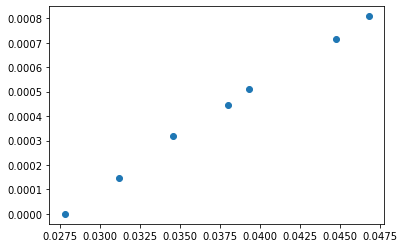

In [39]:
plt.scatter(B,rmg)

No handles with labels found to put in legend.


Slope: 0.04212196865971278 ± 0.0008518822503667286
Intercept: -0.0011582143383924853 ± 3.239064450248499e-05
Residuals: [-1.26921464e-05 -7.43562017e-06  2.15089061e-05  3.07743232e-06
  1.25825428e-05 -1.30585152e-05 -3.98259945e-06]


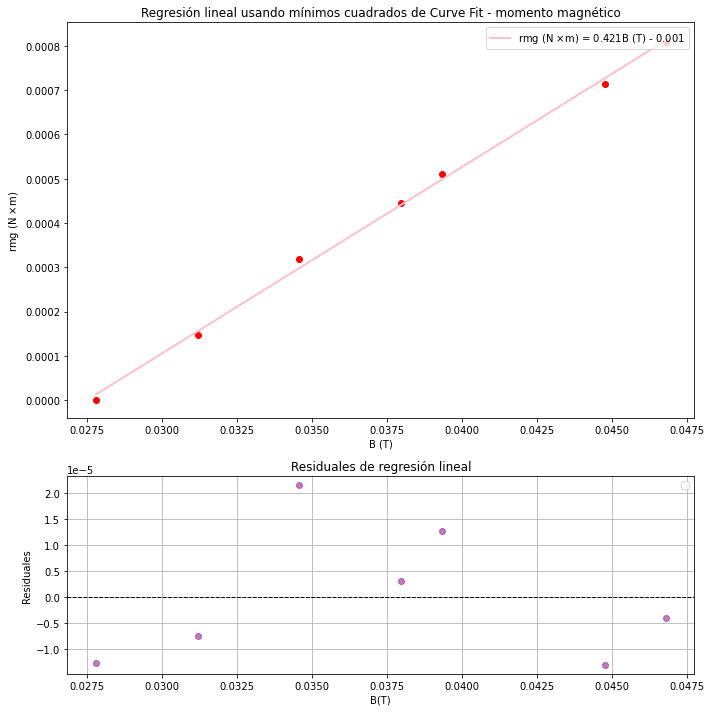

In [46]:
def linear_function(X, a, b):
    return a * X + b


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})

# Iterar sobre el rango deseado

popt, pcov = curve_fit(linear_function, B, rmg)
slope = popt[0]
intercept = popt[1]
    # Obtener los errores estándar de los parámetros
slope_std_err = np.sqrt(pcov[0, 0])
intercept_std_err = np.sqrt(pcov[1, 1])

    # Predecir los valores Y usando la función ajustada
Y_pred = linear_function(B, *popt)

residuals = rmg - Y_pred

print(f"Slope: {slope} ± {slope_std_err}")
print(f"Intercept: {intercept} ± {intercept_std_err}")
print(f"Residuals: {residuals}")

    # Graficar la línea de regresión en el primer subplot
ax1.plot(B, Y_pred, linewidth=2,label='rmg (N $\\times $m) = 0.421B (T) - 0.001',color='pink')
ax1.scatter(B,rmg,color='red')

    # Graficar los residuales en el segundo subplot
ax2.scatter(B, residuals, alpha=0.5,color='purple')

# Configurar etiquetas y leyendas para el primer gráfico (ajuste)
ax1.set_ylabel('rmg (N $\\times $m)')
ax1.set_xlabel('B (T)')
ax1.legend(loc='upper right')
ax1.set_title('Regresión lineal usando mínimos cuadrados de Curve Fit - momento magnético')

# Configurar etiquetas y leyendas para el segundo gráfico (residuales)
ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.set_xlabel('B(T)')
ax2.set_ylabel('Residuales')
ax2.legend(loc='upper right')
ax2.set_title('Residuales de regresión lineal')

# Ajustar el diseño
plt.tight_layout()
plt.grid()
plt.show()